In [163]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

In [164]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [165]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [166]:
Base = automap_base()

Base.prepare(engine, reflect=True)

In [167]:
Base.classes.keys()

['measurement', 'station']

In [168]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [169]:
session = Session(engine)

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


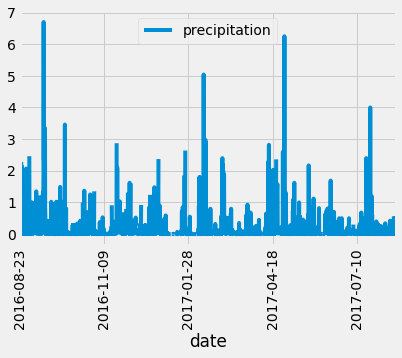

In [170]:
 
prev_year = dt.date(2017, 8, 23)
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)

df = df.sort_index()

df.plot(rot=90)

df.describe()


In [171]:
session.query(func.count(Station.station)).all()

[(9)]

In [172]:
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [173]:
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

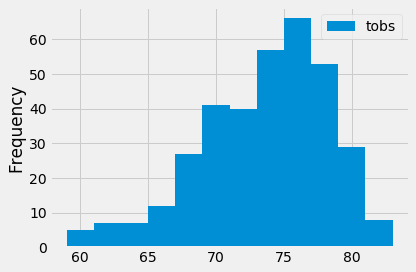

In [174]:
results = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= prev_year).all()
df = pd.DataFrame(results, columns=['tobs'])

df.plot.hist(bins=12)
plt.tight_layout()


In [175]:
def calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

start_date = '2017-06-01'
end_date = '2017-06-30'

temp_stats = calc_temps(start_date, end_date)

print(temp_stats)


[(71.0, 83.0, 77.21989528795811)]


In [176]:
all_dates_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.prcp >= 0).all()
all_dates_df = pd.DataFrame(all_dates_results, columns=['date','precipitation'])
all_dates_df['date'] = pd.to_datetime(all_dates_df['date'])

all_dates_df.describe()


,precipitation
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


In [177]:
all_june_dates = all_dates_df.loc[all_dates_df['date'].dt.month == 6]

all_june_dates.describe()

,precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [178]:
all_december_dates = all_dates_df.loc[all_dates_df['date'].dt.month == 12]

all_december_dates.describe()

,precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000
